In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Personal/OneDrive/Documents/Jupyter Notebook/Customer Segmentation/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={"Genre":"Gender"}, inplace=True)

# Univariate Analysis


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

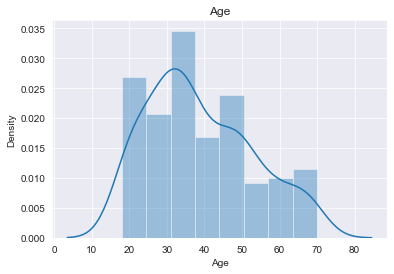

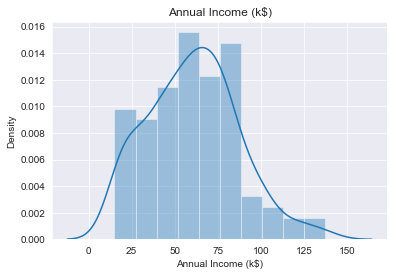

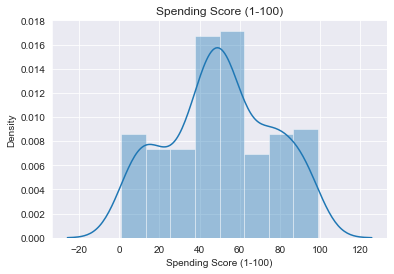

In [6]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.set_style('darkgrid')
    sns.distplot(df[i]);
    plt.title(i)

### Inferences:
• The customers are of wide variety of ages.

• Most of the annual income falls between 50K to 80K

• Most of the Spending Score distribution is concentrated around 40-60

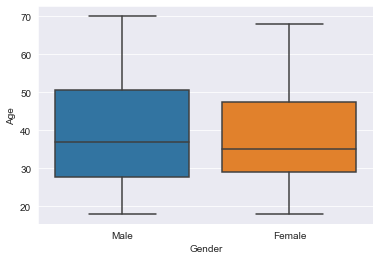

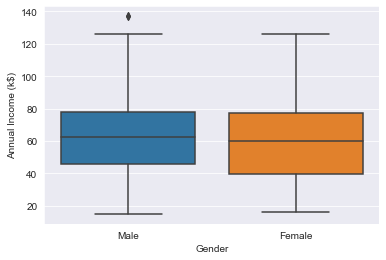

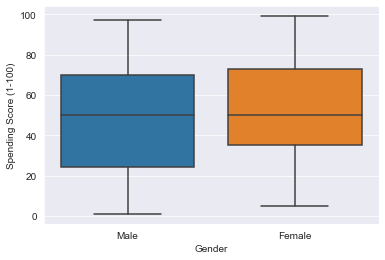

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.set_style('darkgrid')
    sns.boxplot(data = df,x = 'Gender',y = df[i]);
    #plt.title(i)

In [8]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis


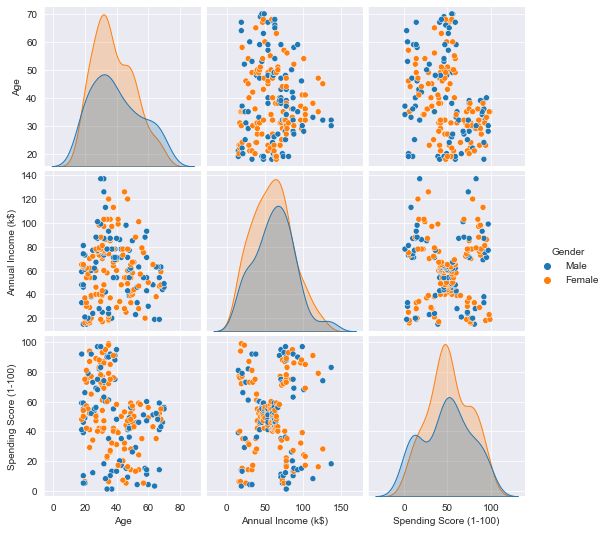

In [9]:
df = df.drop('CustomerID',axis=1)
sns.pairplot(data=df, hue ='Gender');

In [10]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


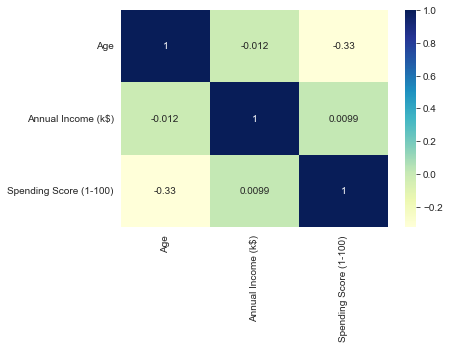

In [11]:
corr = df.corr()
sns.heatmap(corr, annot= True, cmap='YlGnBu');

# Model Buidling

In [12]:
clustering = KMeans(n_clusters=5)
clustering.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Clusters'] = clustering.labels_

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Clusters
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


Text(0, 0.5, 'SSD')

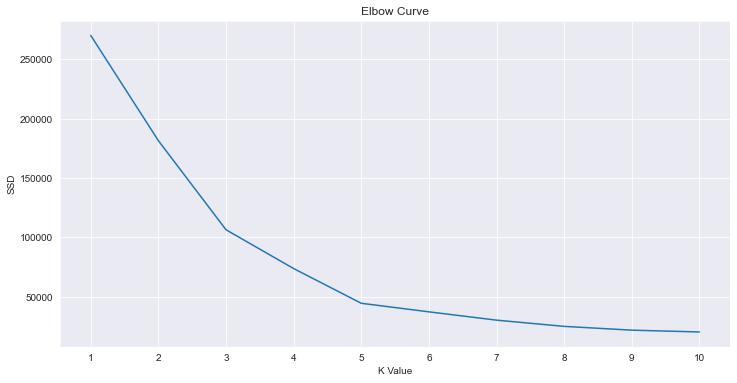

In [14]:
plt.figure(figsize=(12,6))
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11),inertia_scores)
plt.title("Elbow Curve")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

In [15]:
centers = pd.DataFrame(clustering.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


#### Visualizing the clusters 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

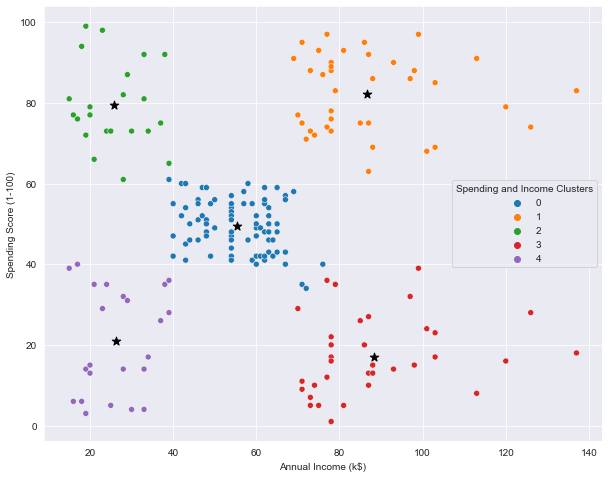

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=80,c='black',marker='*')
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = 'Spending and Income Clusters',palette='tab10')

##### Division of Gender in each cluster 

In [19]:
pd.crosstab(df['Spending and Income Clusters'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Clusters,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


In [20]:
df.groupby(['Spending and Income Clusters'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Clusters,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


# Analysis
1. Cluster 1 is a the target group which has a high income as well as high spending score. Most of the shoppers are women$(53.84$%). One should come up with targeted campaigns with popular products in this category.
2. Cluster 2 is an interesting cluster comprising of relatively younger generation of people with low income but high spending score. Premium or expensive item could be used as a targeted marketing campaign to generate more revenue from this cluster.


# Multivariate Clustering

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scale = StandardScaler()

In [25]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Clusters
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


In [26]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Clusters,Gender_Male
0,19,15,39,4,1
1,21,15,81,2,1
2,20,16,6,4,0
3,23,16,77,2,0
4,31,17,40,4,0


In [27]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Spending and Income Clusters', 'Gender_Male'],
      dtype='object')

In [29]:
dff = dff[['Age', 'Annual Income (k$)','Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [36]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


Text(0, 0.5, 'SSD')

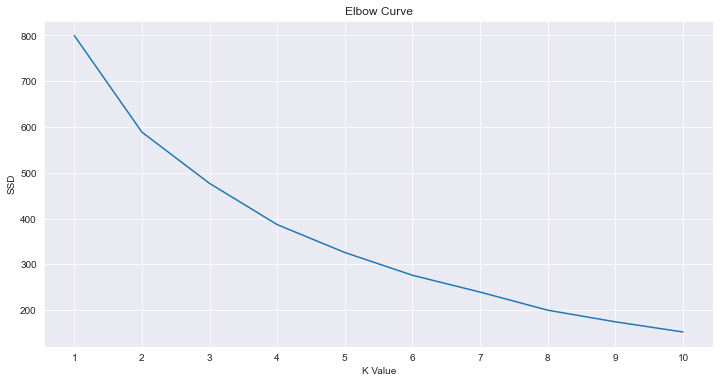

In [37]:
plt.figure(figsize=(12,6))
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(dff)
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)
plt.title("Elbow Curve")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

In [38]:
df.to_csv('Clustering.csv')